In [1]:
# IGNORE THIS :3
import os
from geode import Geode
G = Geode(exec_api = os.environ['EXECUTION_API'], cons_key = os.environ['CONSENSUS_KEY'])
Portal = G.Portal
# IGNORE THIS :3

/Users/akif/Desktop/script/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Datastore

DataStore is designed to host multiple parties with different TYPEs without them affecting each other's storage space under any condition.

This is achieved by utilizing ID and key pairs within the storage.

DataStore can only store 3 types of variables: UINT256, Address, Bytes. 

Worth noting, DataStore not only can store these types, but can also store Arrays of these types and relational data between different IDs by generating a new key for the unqiue combinations.

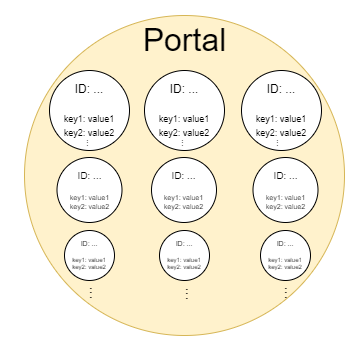


> Pro Tip: If you would like to get the length of an Array from Portal's DataStore, just call `Portal.readUint(id,array_key) `.

## ID and TYPE

### How `ID` is generated?
> keccak(NAME, TYPE) for a pool. NAME is chosen by the pool owner.

In [2]:
from geode.globals import ID_TYPE
from geode.utils import generateId

name = "Ice Bear's Public Pool"
oncId = Portal.functions.generateId(name, ID_TYPE.POOL).call()
ofcId = generateId(name, ID_TYPE.POOL) # suggested for use, because faster

print(f"Portal will create '{name}' with the ID of {oncId}")
print(f"Ofchain 'generateId' function returns {ofcId}.")

Portal will create 'Ice Bear's Public Pool' with the ID of 34810788230056357039548130793632857997510437439560367933584775566082316064998
Ofchain 'generateId' function returns 34810788230056357039548130793632857997510437439560367933584775566082316064998.


### What is 'TYPE'?

> Every ID has a TYPE.
>
> A Pool's TYPE is Pool(5). 
> 
> When a Pool is created, its ID is generated based on its TYPE.
>
> Contract's TYPE is PACKAGE_PORTAL(10001). 
> 
> When a new upgrade for Portal is proposed by the Governance, the proposal will have TYPE defined as 10001. When it is approved, portal will upgrade itself.

### Get All IDs from a TYPE

In [3]:
from geode.globals import ID_TYPE

# Getting All IDs of a TYPE
pLen=Portal.functions.allIdsByTypeLength(ID_TYPE.POOL).call()
oLen=Portal.functions.allIdsByTypeLength(ID_TYPE.OPERATOR).call()

pid = Portal.functions.allIdsByType(ID_TYPE.POOL, 1).call()
oid = Portal.functions.allIdsByType(ID_TYPE.OPERATOR, 0).call()

print(f"There are {pLen} pools and {oLen} operators. The seconds Pool' id is {pid} and the first operator is {oid}.")

There are 26 pools and 15 operators. The seconds Pool' id is 81560630616877542516430504767934674568390741163160307132946078760142301602493 and the first operator is 114391297015478800753082638170652680401082080549997516459063441314156612391510.


## Ready for a deep dive?

In [4]:
from geode.utils import toBytes32, toString 
# readBytes readBytesArray etc requires a bytes32 key

t=Portal.functions.readUint(pid, toBytes32("TYPE")).call()
c=Portal.functions.readAddress(pid, toBytes32("CONTROLLER")).call()
n=Portal.functions.readBytes(pid, toBytes32("NAME")).call()
toString(n), ID_TYPE(t) , c

("Ice Bear's Private Pool",
 <ID_TYPE.POOL: 5>,
 '0x2C95BC18Fd9382a07776D416EeF6c2FEb3AD2A8C')

### Reading Arrays

In [5]:
Portal.functions.readUint(pid, toBytes32("middlewares")).call() # gives length
Portal.functions.readAddressArray(pid, toBytes32("middlewares"),index=0).call() # gives data from array with index

'0xfB14d9dCC168Ba2374cd9c0bA4601AA76162F845'

### Relational Data!

Sometimes it is useful to get some uninterpereted data.

We can also read relational data between two IDs. To achieve this, we will create a unique key for <ID, key> pair. check the getKey function below.

In [6]:
from geode.utils import getKey # readBytes readBytesArray etc requires a bytes32 key

# Portal.allowance function returns the remaining seats for validator creation. 
# But, this can be limited by the monopoly threshold etc.
# You can still get the pure allowance tho:
 
operator_allowance_key = getKey(id=oid, key="allowance") # reusable for any pool! :)
Portal.functions.readUint(pid, operator_allowance_key).call()

999999